# Ecercise 2.
Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!


In [2]:
import numpy as np

def er_graph_adj_matrix(N, p):
    A = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1

    return A


In [3]:
A = er_graph_adj_matrix(50, 0.2)
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Excercise 3.
Draw resulting graph


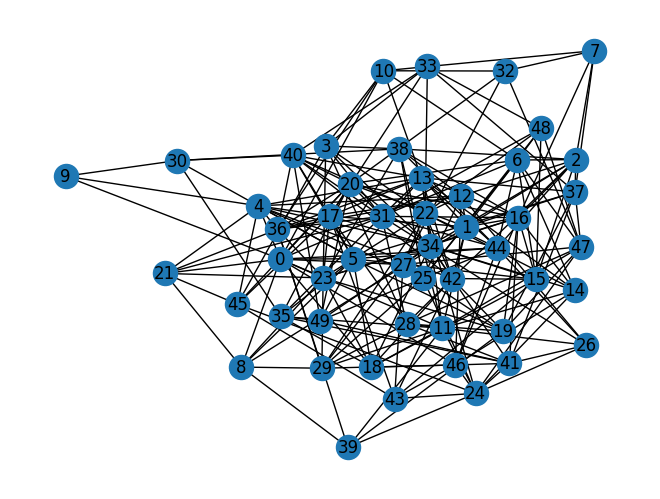

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_er_graph(N, p):
    A = er_graph_adj_matrix(N, p)
    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True)
    plt.show()
    return A, G

A, G = draw_er_graph(50, 0.2)


Excercise 4.
Draw histogram of degree distribution.

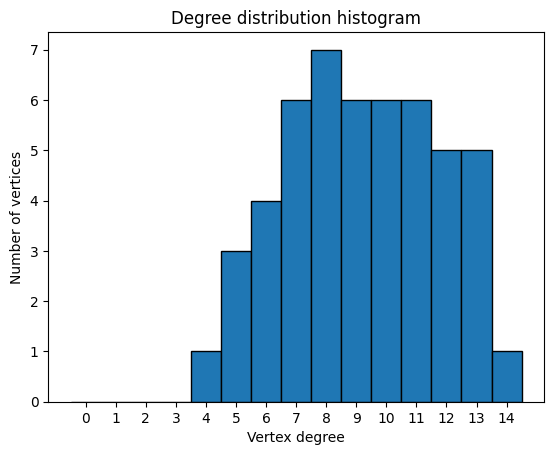

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_degree_histogram(A):
    G = nx.from_numpy_array(A)
    degrees = [d for n, d in G.degree()]

    # Integer bins
    bins = np.arange(0, max(degrees) + 2) - 0.5

    plt.figure()
    plt.hist(degrees, bins=bins, edgecolor='black')
    plt.xlabel("Vertex degree")
    plt.ylabel("Number of vertices")
    plt.title("Degree distribution histogram")
    plt.xticks(range(0, max(degrees) + 1))
    plt.show()

N = 50
p = 0.2
A = er_graph_adj_matrix(N, p)
draw_degree_histogram(A)



# Excercise 5.
What degree of vertex distribution do we expect?


In an Erdős–Rényi graph **G(N, p)**, the degree of each vertex follows a **binomial distribution**:

$$
\deg(v) \sim \text{Binomial}(N-1,\, p)
$$

**Expected degree:**

$$
\mathbb{E}[\deg(v)] = (N-1)p
$$





# Excercise 6.
Give the mathematical justification for the Poisson approximation
used. - https://healy.econ.ohio-state.edu/kcb/Ma103/Notes/Lecture13.pdf

In an Erdős–Rényi graph \(G(N,p)\), the degree of a fixed vertex has a binomial distribution
$$
\deg(v) \sim \text{Binomial}(N-1, p).
$$

Let
$$
n = N - 1, \quad X \sim \text{Binomial}(n, p).
$$
We choose
$$
p = \frac{\lambda}{n},
$$
so that
$$
\mathbb{E}[X] = np = \lambda
$$
stays fixed as \(n \to \infty\).

The binomial pmf is
$$
\mathbb{P}(X = k)
= \binom{n}{k} p^k (1-p)^{n-k}
= \binom{n}{k} \left(\frac{\lambda}{n}\right)^k
\left(1 - \frac{\lambda}{n}\right)^{n-k}.
$$

We now take the limit as \(n \to \infty\) for fixed \(k\).

First term:
$$
\binom{n}{k} \left(\frac{\lambda}{n}\right)^k
= \frac{n(n-1)\cdots(n-k+1)}{k!} \cdot \frac{\lambda^k}{n^k}
= \frac{\lambda^k}{k!} \prod_{j=0}^{k-1} \left(1 - \frac{j}{n}\right)
\longrightarrow \frac{\lambda^k}{k!}.
$$

Second term:
$$
\left(1 - \frac{\lambda}{n}\right)^{n-k}
= \left(1 - \frac{\lambda}{n}\right)^n
  \left(1 - \frac{\lambda}{n}\right)^{-k}
\longrightarrow e^{-\lambda} \cdot 1
= e^{-\lambda}.
$$

Combining these limits:
$$
\mathbb{P}(X = k)
\longrightarrow e^{-\lambda} \frac{\lambda^k}{k!},
$$
which is exactly the pmf of a Poisson\((\lambda)\) distribution.

Therefore, for large \(N\) and small \(p\) with \((N-1)p = \lambda\) fixed, the degree of a vertex in \(G(N,p)\) is well approximated by a Poisson\((\lambda)\) distribution.


# Excercise 7.
Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, chisquare

def er_graph_adj_matrix(N, p):
    A = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1
    return A


def safe_chisquare(obs, exp, thresh=1.0):
    mask = exp > thresh
    if np.sum(mask) < 2:
        return np.nan
    obs2 = obs[mask]
    exp2 = exp[mask]

    scale = obs2.sum() / exp2.sum()
    exp2 = exp2 * scale

    return chisquare(obs2, f_exp=exp2).pvalue


def plot_degree_distribution_with_tests(N, p, num_graphs=500):

    all_degrees = []

    for _ in range(num_graphs):
        A = er_graph_adj_matrix(N, p)
        degrees = np.sum(A, axis=1)
        all_degrees.extend(degrees)

    degree_min = min(all_degrees)
    degree_max = max(all_degrees)

    k_vals = np.arange(degree_min, degree_max + 1)
    bins = np.arange(degree_min, degree_max + 2) - 0.5

    plt.figure(figsize=(10, 6))
    counts, _, _ = plt.hist(all_degrees, bins=bins, density=True,
                            color='lightblue', edgecolor='black',
                            label="Simulation (averaged)")

    total = len(all_degrees)
    obs_counts = counts * total

    prob_binom = binom.pmf(k_vals, N - 1, p)
    plt.plot(k_vals, prob_binom, "o-", label="Binomial", color="green")

    lam = (N - 1) * p
    prob_poisson = poisson.pmf(k_vals, lam)
    plt.plot(k_vals, prob_poisson, "s--", label=f"Poisson (λ={lam:.2f})", color="red")

    exp_binom = prob_binom * total
    exp_poisson = prob_poisson * total

    p_binom = safe_chisquare(obs_counts, exp_binom)
    p_poisson = safe_chisquare(obs_counts, exp_poisson)

    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.title(f"ER(N={N}, p={p}) — {num_graphs} simulations\n"
              f"Chi-square p-values: Binomial={p_binom:.3f}, Poisson={p_poisson:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Excercises 8.
Check dependence of the results of the previous excercise for
various values of p and N.



=== N = 50, p = 0.05 ===


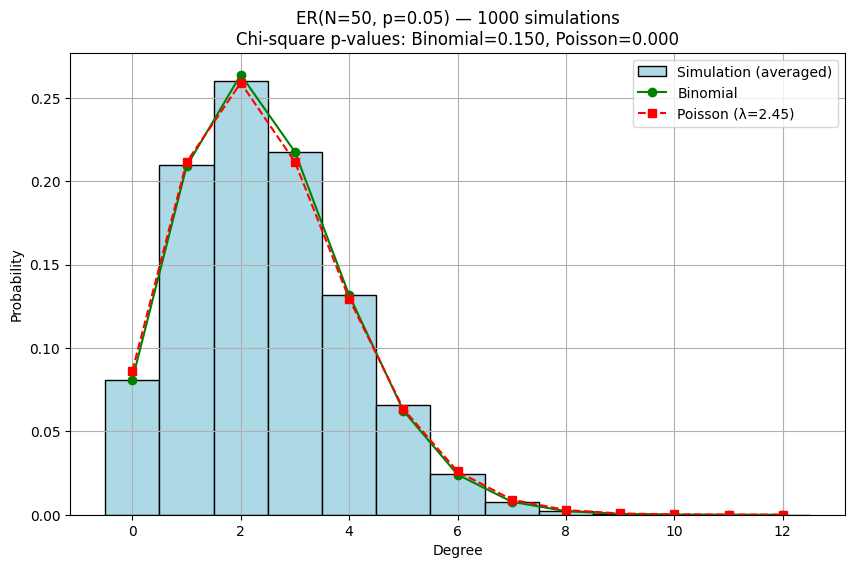


=== N = 50, p = 0.1 ===


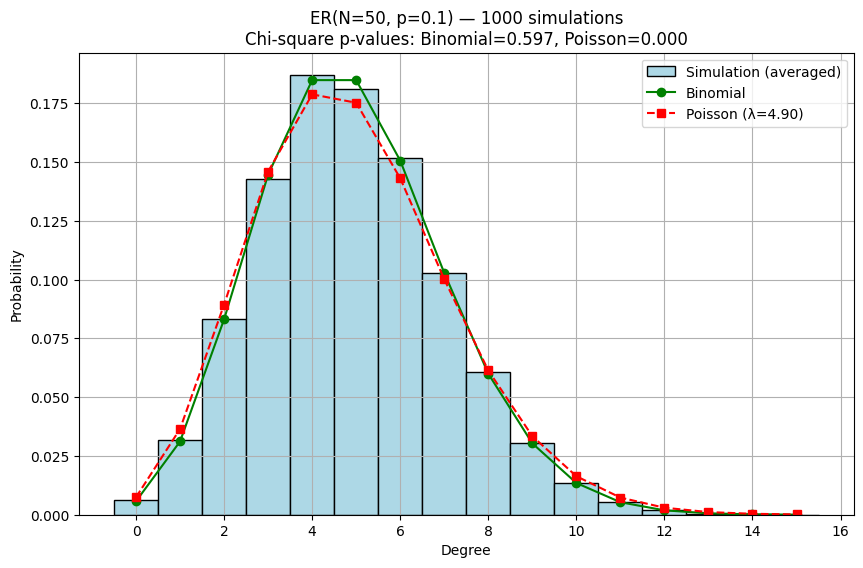


=== N = 50, p = 0.3 ===


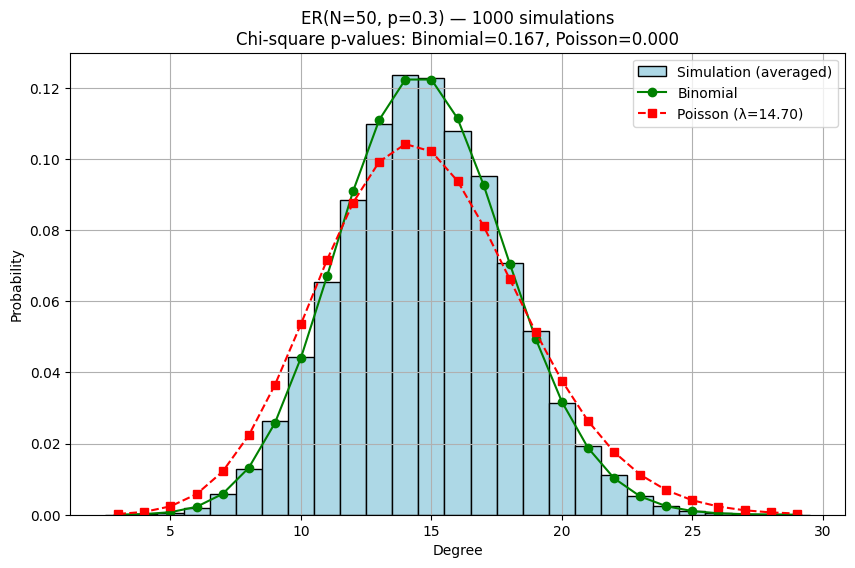


=== N = 100, p = 0.05 ===


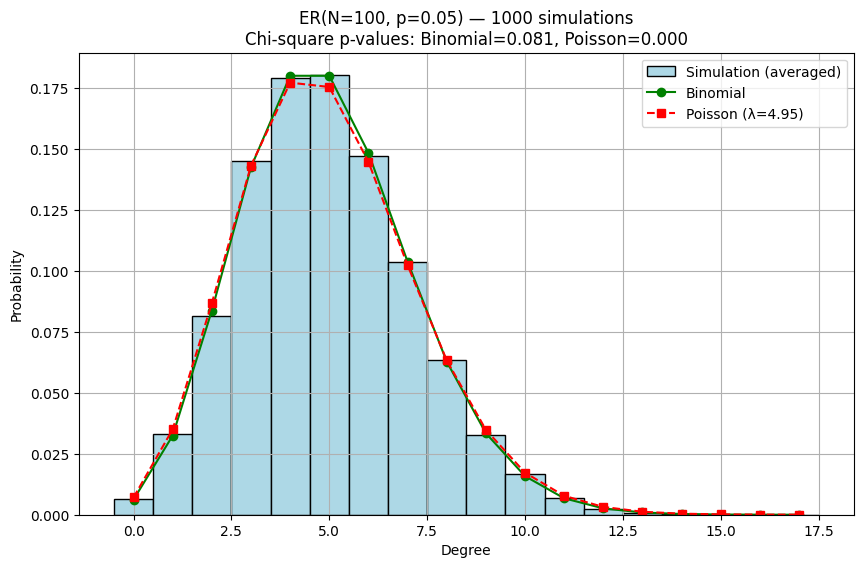


=== N = 100, p = 0.1 ===


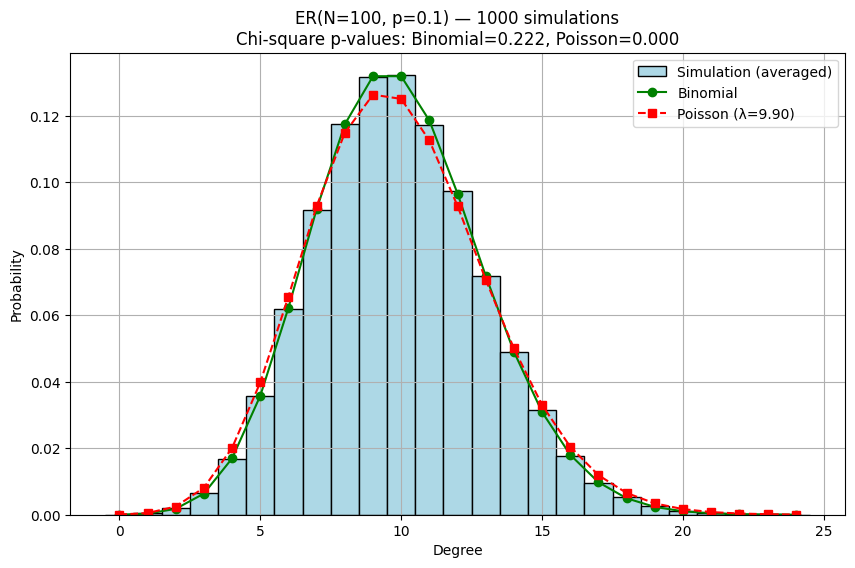


=== N = 100, p = 0.3 ===


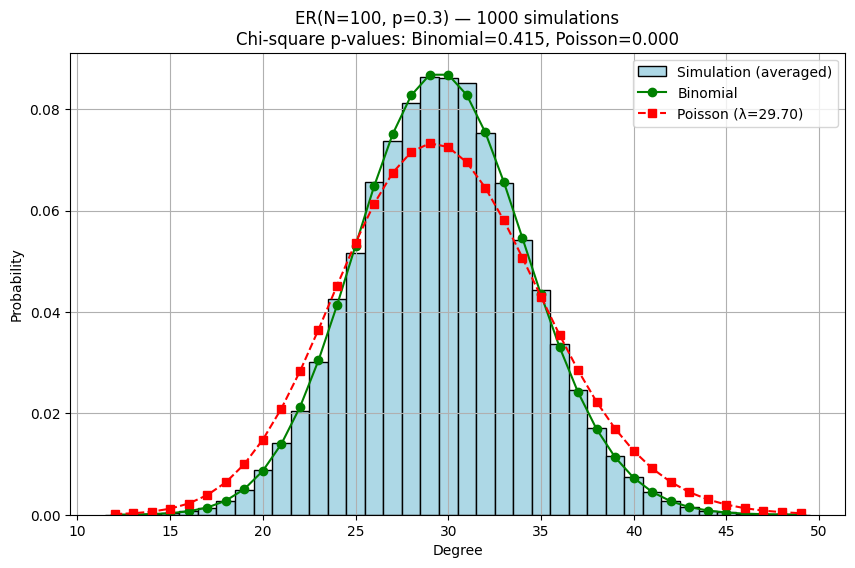


=== N = 200, p = 0.05 ===


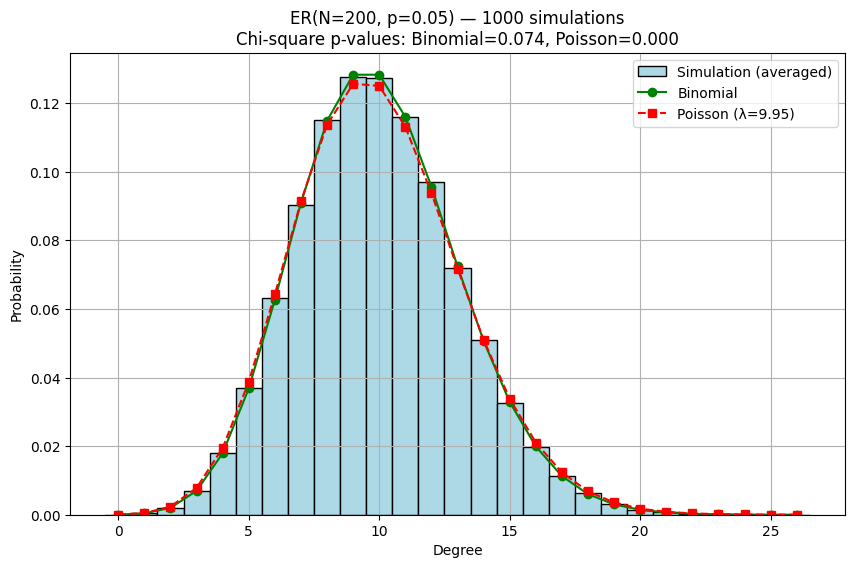


=== N = 200, p = 0.1 ===


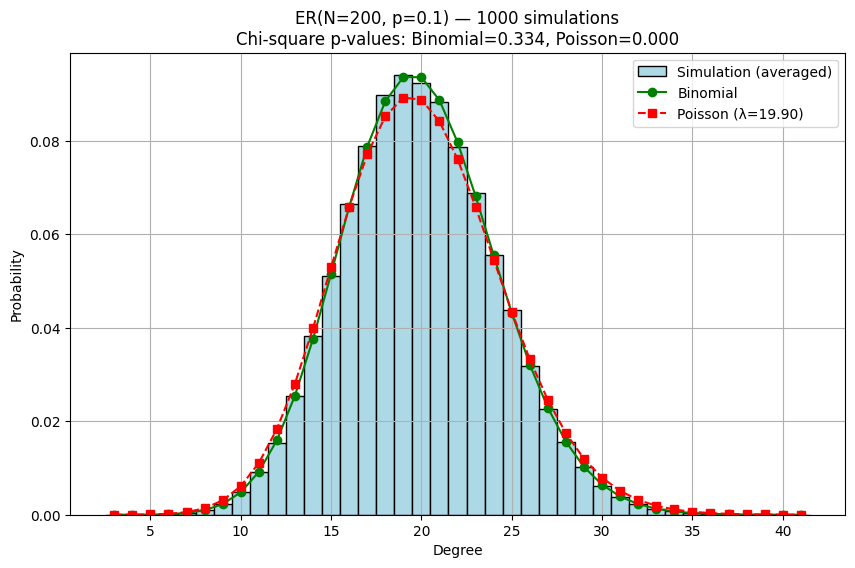


=== N = 200, p = 0.3 ===


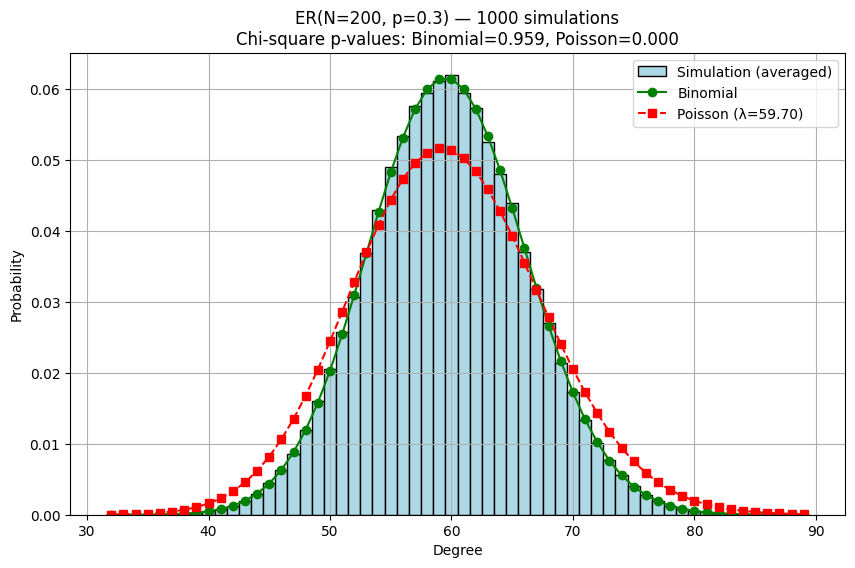

In [17]:
N_list = [50, 100, 200]
p_list = [0.05, 0.1, 0.3]
num_graphs = 1000

for N in N_list:
    for p in p_list:
        print(f"\n=== N = {N}, p = {p} ===")
        plot_degree_distribution_with_tests(N, p, num_graphs)


# P5.2
 Check the above analytical result by simulation

--- Simulation Results ---
p = 0.010,  simulated ⟨C⟩ = 0.0063 ± 0.0065,  theory = 0.010
p = 0.050,  simulated ⟨C⟩ = 0.0492 ± 0.0047,  theory = 0.050
p = 0.090,  simulated ⟨C⟩ = 0.0900 ± 0.0032,  theory = 0.090
p = 0.130,  simulated ⟨C⟩ = 0.1300 ± 0.0030,  theory = 0.130
p = 0.170,  simulated ⟨C⟩ = 0.1698 ± 0.0031,  theory = 0.170
p = 0.210,  simulated ⟨C⟩ = 0.2099 ± 0.0035,  theory = 0.210
p = 0.250,  simulated ⟨C⟩ = 0.2489 ± 0.0034,  theory = 0.250


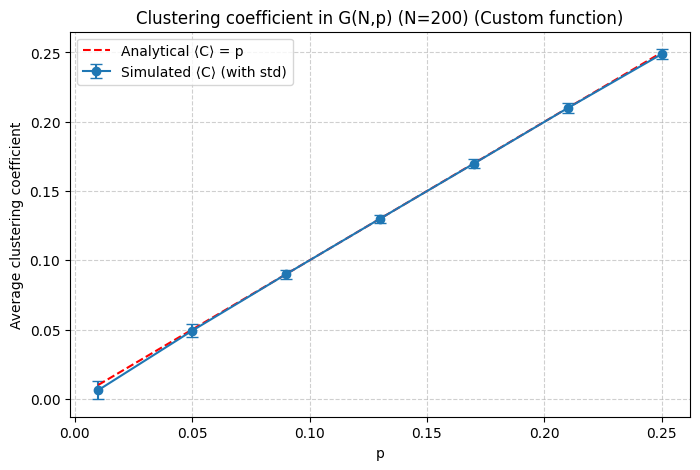

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def calculate_average_clustering(g):
    total_score = 0.0
    all_nodes = list(g.nodes())

    if not all_nodes:
        return 0.0

    for current_node in all_nodes:
        node_neighbors = list(g.neighbors(current_node))
        k = len(node_neighbors)

        node_score = 0.0

        if k >= 2:
            existing_triangles = 0

            neighbor_subgraph = g.subgraph(node_neighbors)

            for u in node_neighbors:
                for v in node_neighbors:
                    if u < v and neighbor_subgraph.has_edge(u, v):
                        existing_triangles += 1

            max_possible_triangles = (k * (k - 1)) / 2

            if max_possible_triangles > 0:
                node_score = existing_triangles / max_possible_triangles

        total_score += node_score

    return total_score / len(all_nodes)


def simulate_clustering(N, p, n_runs=100):
    Clustering_Coefficients = []

    for _ in range(n_runs):
        G = nx.erdos_renyi_graph(N, p)
        C = calculate_average_clustering(G)
        Clustering_Coefficients.append(C)

    return np.array(Clustering_Coefficients)


N = 200
p_values = np.linspace(0.01, 0.25, 7)
n_runs = 80

mean_results = []
std_results = []

print("--- Simulation Results ---")
for p in p_values:
    Cs = simulate_clustering(N, p, n_runs)
    mean = Cs.mean()
    std = Cs.std()

    mean_results.append(mean)
    std_results.append(std)
    print(f"p = {p:.3f},  simulated ⟨C⟩ = {mean:.4f} ± {std:.4f},  theory = {p:.3f}")

plt.figure(figsize=(8, 5))
plt.errorbar(p_values, mean_results, yerr=std_results, fmt="o-", capsize=4,
             label="Simulated ⟨C⟩ (with std)")

plt.plot(p_values, p_values, "r--", label="Analytical ⟨C⟩ = p")

plt.xlabel("p")
plt.ylabel("Average clustering coefficient")
plt.title(f"Clustering coefficient in G(N,p) (N={N}) (Custom function)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# P5.3
 Generate and draw a graph consisting of 4 community each with
N = 20 nodes and the probability of connection within the
community higher than between them. Draw the result. How it
depends on the parameter values?

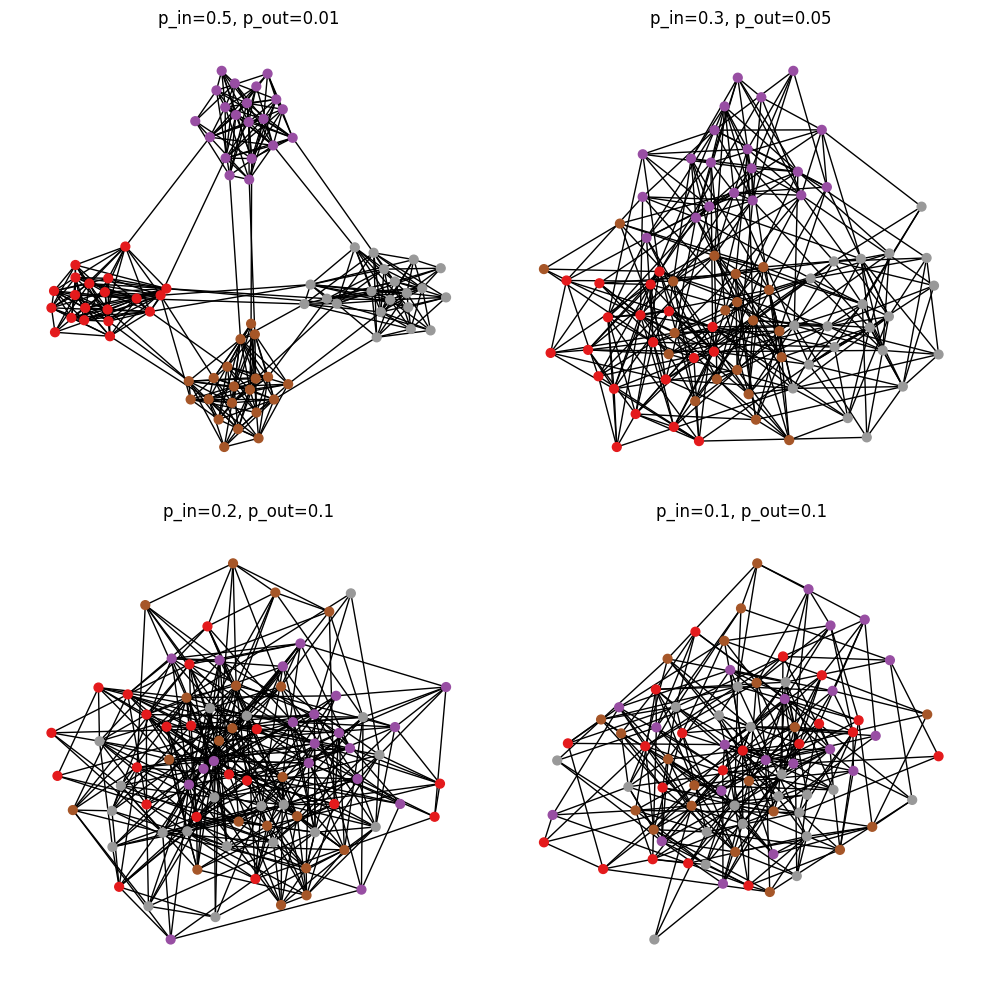

In [10]:
def community_graph_adj_matrix(num_communities=4, nodes_per_community=20,
                               p_in=0.4, p_out=0.02):
    N = num_communities * nodes_per_community
    A = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            comm_i = i // nodes_per_community
            comm_j = j // nodes_per_community
            p = p_in if comm_i == comm_j else p_out
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1
    return A

def draw_community_graph(num_communities=4, nodes_per_community=20,
                         p_in=0.4, p_out=0.02):
    A = community_graph_adj_matrix(num_communities, nodes_per_community,
                                   p_in, p_out)
    G = nx.from_numpy_array(A)

    N = num_communities * nodes_per_community
    communities = [i // nodes_per_community for i in range(N)]

    pos = nx.spring_layout(G)

    plt.figure(figsize=(7, 7))
    nx.draw(
        G,
        pos,
        node_color=communities,
        cmap=plt.cm.Set1,
        with_labels=False,
        node_size=80
    )
    plt.title(f"4-community graph, N=20 per community\np_in={p_in}, p_out={p_out}")
    plt.show()

    return A, G

params = [
    (0.5, 0.01),
    (0.3, 0.05),
    (0.2, 0.10),
    (0.1, 0.10)
]

plt.figure(figsize=(10, 10))

for idx, (p_in, p_out) in enumerate(params, 1):
    A = community_graph_adj_matrix(
        num_communities=4,
        nodes_per_community=20,
        p_in=p_in,
        p_out=p_out
    )
    G = nx.from_numpy_array(A)
    communities = [i // 20 for i in range(80)]
    pos = nx.spring_layout(G, seed=42)

    plt.subplot(2, 2, idx)
    nx.draw(G, pos, node_color=communities, cmap=plt.cm.Set1,
            node_size=40, with_labels=False)
    plt.title(f"p_in={p_in}, p_out={p_out}")

plt.tight_layout()
plt.show()



The structure of the graph depends strongly on the relationship between
\( p_{\text{in}} \) and \( p_{\text{out}} \).

When \( p_{\text{in}} \gg p_{\text{out}} \) (e.g., 0.5 vs 0.01), the four communities
are clearly visible as dense, well-separated clusters.

As \( p_{\text{in}} \) decreases and \( p_{\text{out}} \) increases (e.g., 0.3/0.05 or
0.2/0.1), the boundaries between communities become less distinct and clusters
start to overlap.

When \( p_{\text{in}} \approx p_{\text{out}} \) (e.g., 0.1 vs 0.1), the community
structure disappears almost completely and the graph resembles a homogeneous
Erdős–Rényi random network.


# P5.4
 Draw a graph of the averaged coefficient of clustering of the WS
network against its parameter p. [1.5P]


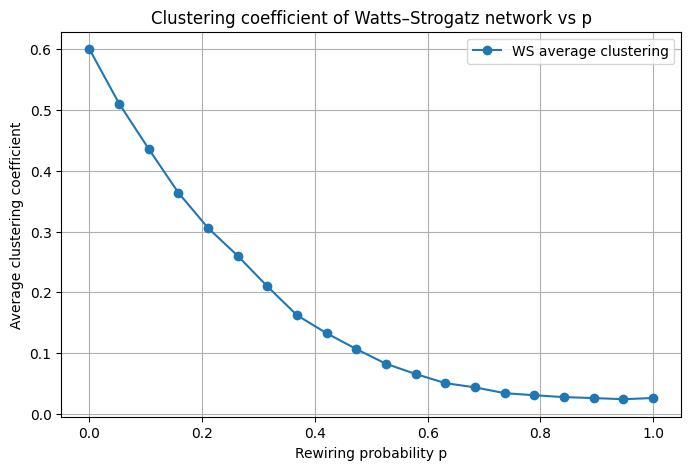

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compute_ws_clustering(N=200, k=6, p_values=None, runs=20):
    if p_values is None:
        p_values = np.linspace(0, 1, 20)

    C_means = []

    for p in p_values:
        Cs = []
        for _ in range(runs):
            G = nx.watts_strogatz_graph(N, k, p)
            C = calculate_average_clustering(G)
            Cs.append(C)
            Cs.append(C)
        C_means.append(np.mean(Cs))

    return p_values, np.array(C_means)

N = 200
k = 6
runs = 20
p_values = np.linspace(0, 1, 20)

ps, Cs = compute_ws_clustering(N, k, p_values, runs)

plt.figure(figsize=(8, 5))
plt.plot(ps, Cs, "o-", label="WS average clustering")
plt.xlabel("Rewiring probability p")
plt.ylabel("Average clustering coefficient")
plt.title("Clustering coefficient of Watts–Strogatz network vs p")
plt.grid(True)
plt.legend()
plt.show()


# P5.6
Implement configuration model and test when the procedure converge.

swaps/edge =  0.0, swaps =     0, avg clustering = 0.4595
swaps/edge =  0.5, swaps =   300, avg clustering = 0.0388
swaps/edge =  1.0, swaps =   600, avg clustering = 0.0319
swaps/edge =  2.0, swaps =  1200, avg clustering = 0.0163
swaps/edge =  5.0, swaps =  3000, avg clustering = 0.0260
swaps/edge = 10.0, swaps =  6000, avg clustering = 0.0277
swaps/edge = 20.0, swaps = 12000, avg clustering = 0.0185


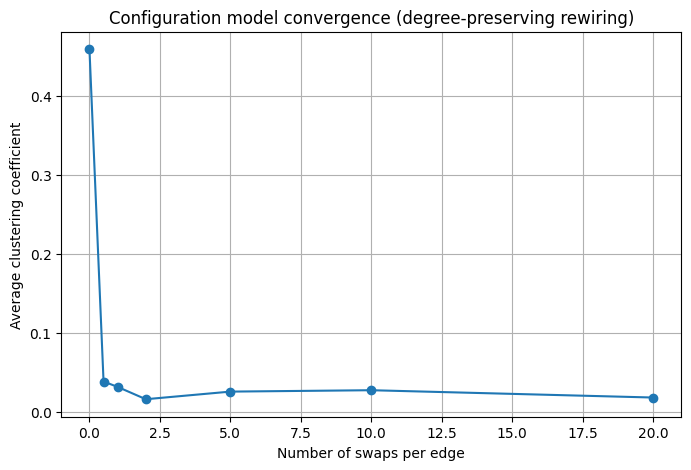

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def random_edge_swap(G, num_swaps, max_tries_per_swap=10):
    G = G.copy()
    edges = list(G.edges())
    m = len(edges)
    successful_swaps = 0

    while successful_swaps < num_swaps:
        for _ in range(max_tries_per_swap):
            (u, v) = edges[random.randrange(m)]
            (x, y) = edges[random.randrange(m)]
            if len({u, v, x, y}) < 4:
                continue

            if random.random() < 0.5:
                a, b = u, x
                c, d = v, y
            else:
                a, b = u, y
                c, d = v, x

            if a == b or c == d:
                continue
            if G.has_edge(a, b) or G.has_edge(c, d):
                continue

            G.remove_edge(u, v)
            G.remove_edge(x, y)
            G.add_edge(a, b)
            G.add_edge(c, d)

            edges = list(G.edges())
            m = len(edges)
            successful_swaps += 1
            break
        else:
            break

    return G


def test_configuration_model_convergence():
    N = 200
    k = 6
    p_ws = 0.1
    G0 = nx.watts_strogatz_graph(N, k, p_ws)

    m = G0.number_of_edges()
    swaps_per_edge_list = [0, 0.5, 1, 2, 5, 10, 20]

    clustering_values = []

    for s in swaps_per_edge_list:
        num_swaps = int(s * m)
        G = random_edge_swap(G0, num_swaps)
        C = calculate_average_clustering(G)
        clustering_values.append(C)
        print(f"swaps/edge = {s:4.1f}, swaps = {num_swaps:5d}, "
              f"avg clustering = {C:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(swaps_per_edge_list, clustering_values, "o-")
    plt.xlabel("Number of swaps per edge")
    plt.ylabel("Average clustering coefficient")
    plt.title("Configuration model convergence (degree-preserving rewiring)")
    plt.grid(True)
    plt.show()


test_configuration_model_convergence()
